# 1.1 Overview of Time Series Characteristics

In [2]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt

jtplot.style(figsize=(15, 9))

In [3]:
df = pd.read_csv('data/Annual_Surface_Temperature_Change.csv', index_col='Country')
df.head()

,ObjectId,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,F1961,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
Country,,,,,,,,,,,,,,,,,,,,,
"Afghanistan, Islamic Rep. of",1,AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",-0.113,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
Albania,2,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.627,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
Algeria,3,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.164,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
American Samoa,4,AS,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.079,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
"Andorra, Principality of",5,AD,AND,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",0.736,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [3]:
data = df[df.columns.to_list()[9:]]
data.head()

,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,F1970,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
Country,,,,,,,,,,,,,,,,,,,,,
"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
American Samoa,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


In [4]:
data.columns = np.arange(1961, 2023)
data.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,,,,,,,,,,,,,,
"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,0.813,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,-0.106,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,0.116,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
American Samoa,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,-0.047,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,0.121,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243


Text(0.5, 1.0, 'Botswana. Stationary')

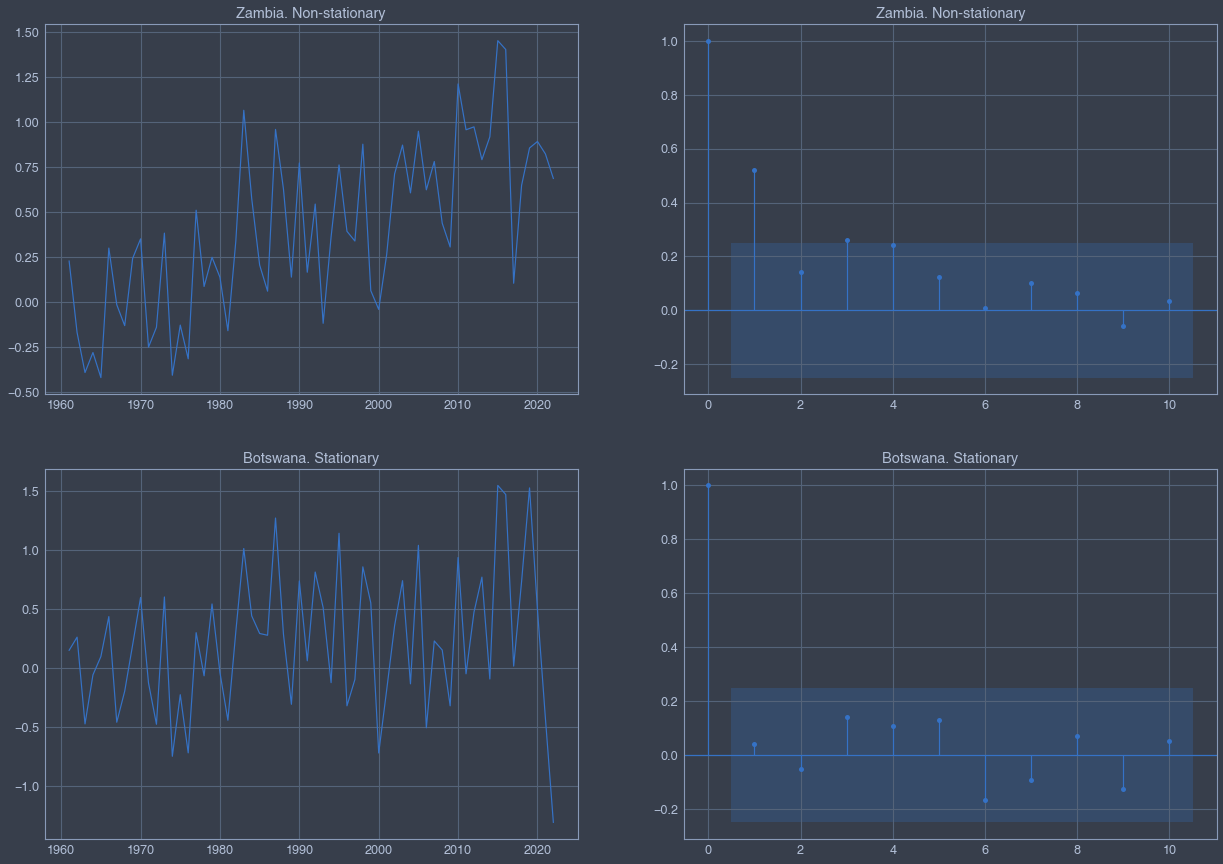

In [20]:
fig, ax = plt.subplots(2, 2, figsize=(21, 15))

data.loc['Zambia'].plot(ax=ax[0, 0])
ax[0, 0].set_title('Zambia. Non-stationary')
pacf = plot_pacf(data.loc['Zambia'], lags=10, ax=ax[0, 1])
ax[0, 1].set_title('Zambia. Non-stationary')

data.loc['Botswana'].plot(ax=ax[1, 0])
ax[1, 0].set_title('Botswana. Stationary')
pacf = plot_pacf(data.loc['Botswana'], lags=10, ax=ax[1, 1])
ax[1, 1].set_title('Botswana. Stationary')

In [9]:
stat_test = adfuller(data.loc['Zambia'], autolag='AIC')
print(f'p-value: {stat_test[1]}')

p-value: 0.36513869161214285


In [10]:
data.dropna(inplace=True, axis=0)

f:\python\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [11]:
stat_country = [] 
for n, c in enumerate(data.index):
    p_val = adfuller(data.loc[c], autolag='AIC')[1]
    if  p_val <= 0.05:
        stat_country.append(c)
        print(f'{n}/225__Country: {c}, p-value: {p_val}')

16/225__Country: Botswana, p-value: 1.1686004245364393e-09
27/225__Country: Chile, p-value: 0.0001045422155932559
93/225__Country: Mauritius, p-value: 0.03859618007874653
96/225__Country: Mongolia, p-value: 0.01509390100672503
100/225__Country: Namibia, p-value: 1.8387207785457222e-06
109/225__Country: Oman, p-value: 0.02789225606495387
115/225__Country: Poland, Rep. of, p-value: 0.0025007800363864067
121/225__Country: Saint Pierre and Miquelon, p-value: 0.02015724616422178
157/225__Country: Zimbabwe, p-value: 8.909385023415115e-10


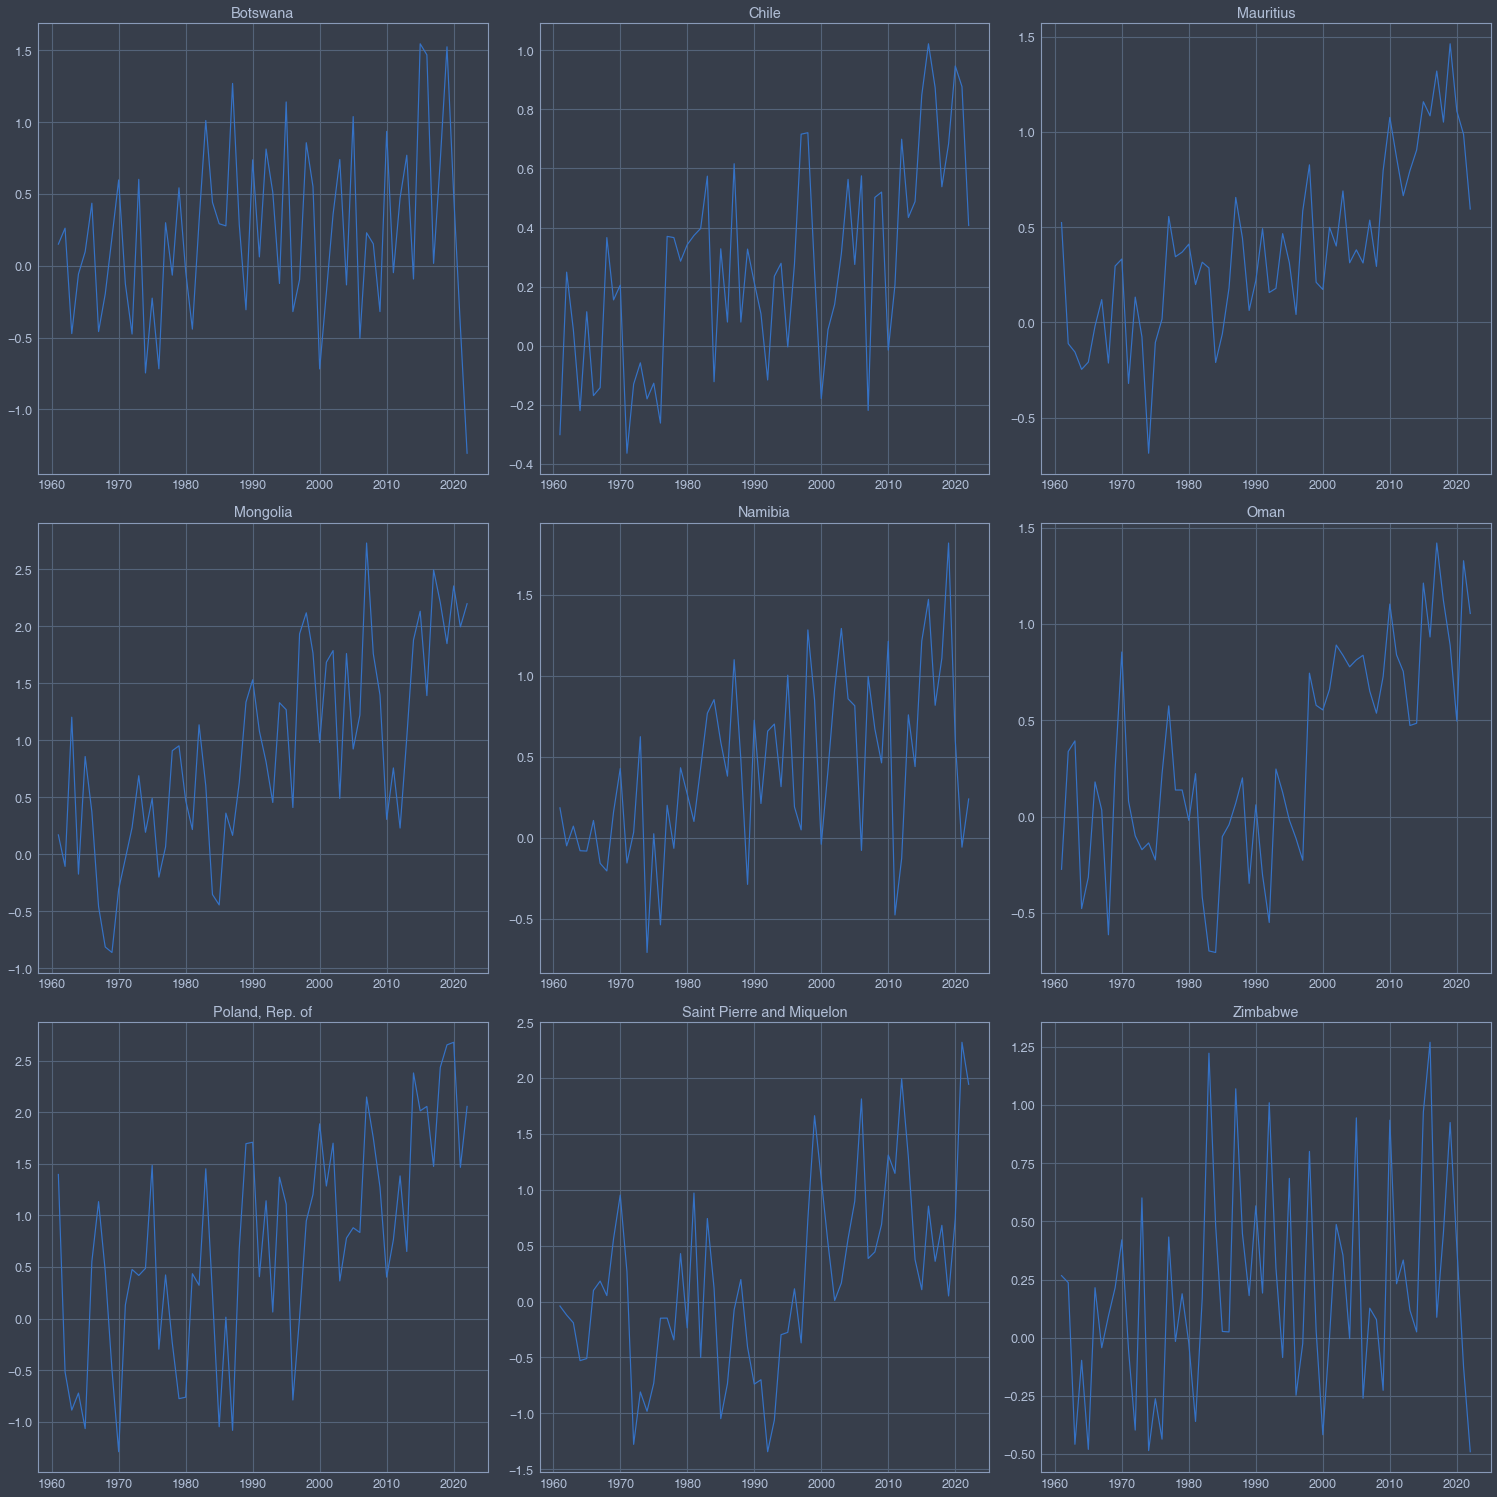

In [56]:
fig, axs = plt.subplots(3, 3, figsize=(21, 21))

axs_places = np.array(np.meshgrid([0, 1, 2], [0, 1, 2])).T.reshape(-1, 2)
for c, ax in zip(stat_country, axs_places):
    data.loc[c].plot(ax=axs[list(ax)[0], list(ax)[1]])
    axs[list(ax)[0], list(ax)[1]].set_title(c)
fig.tight_layout()

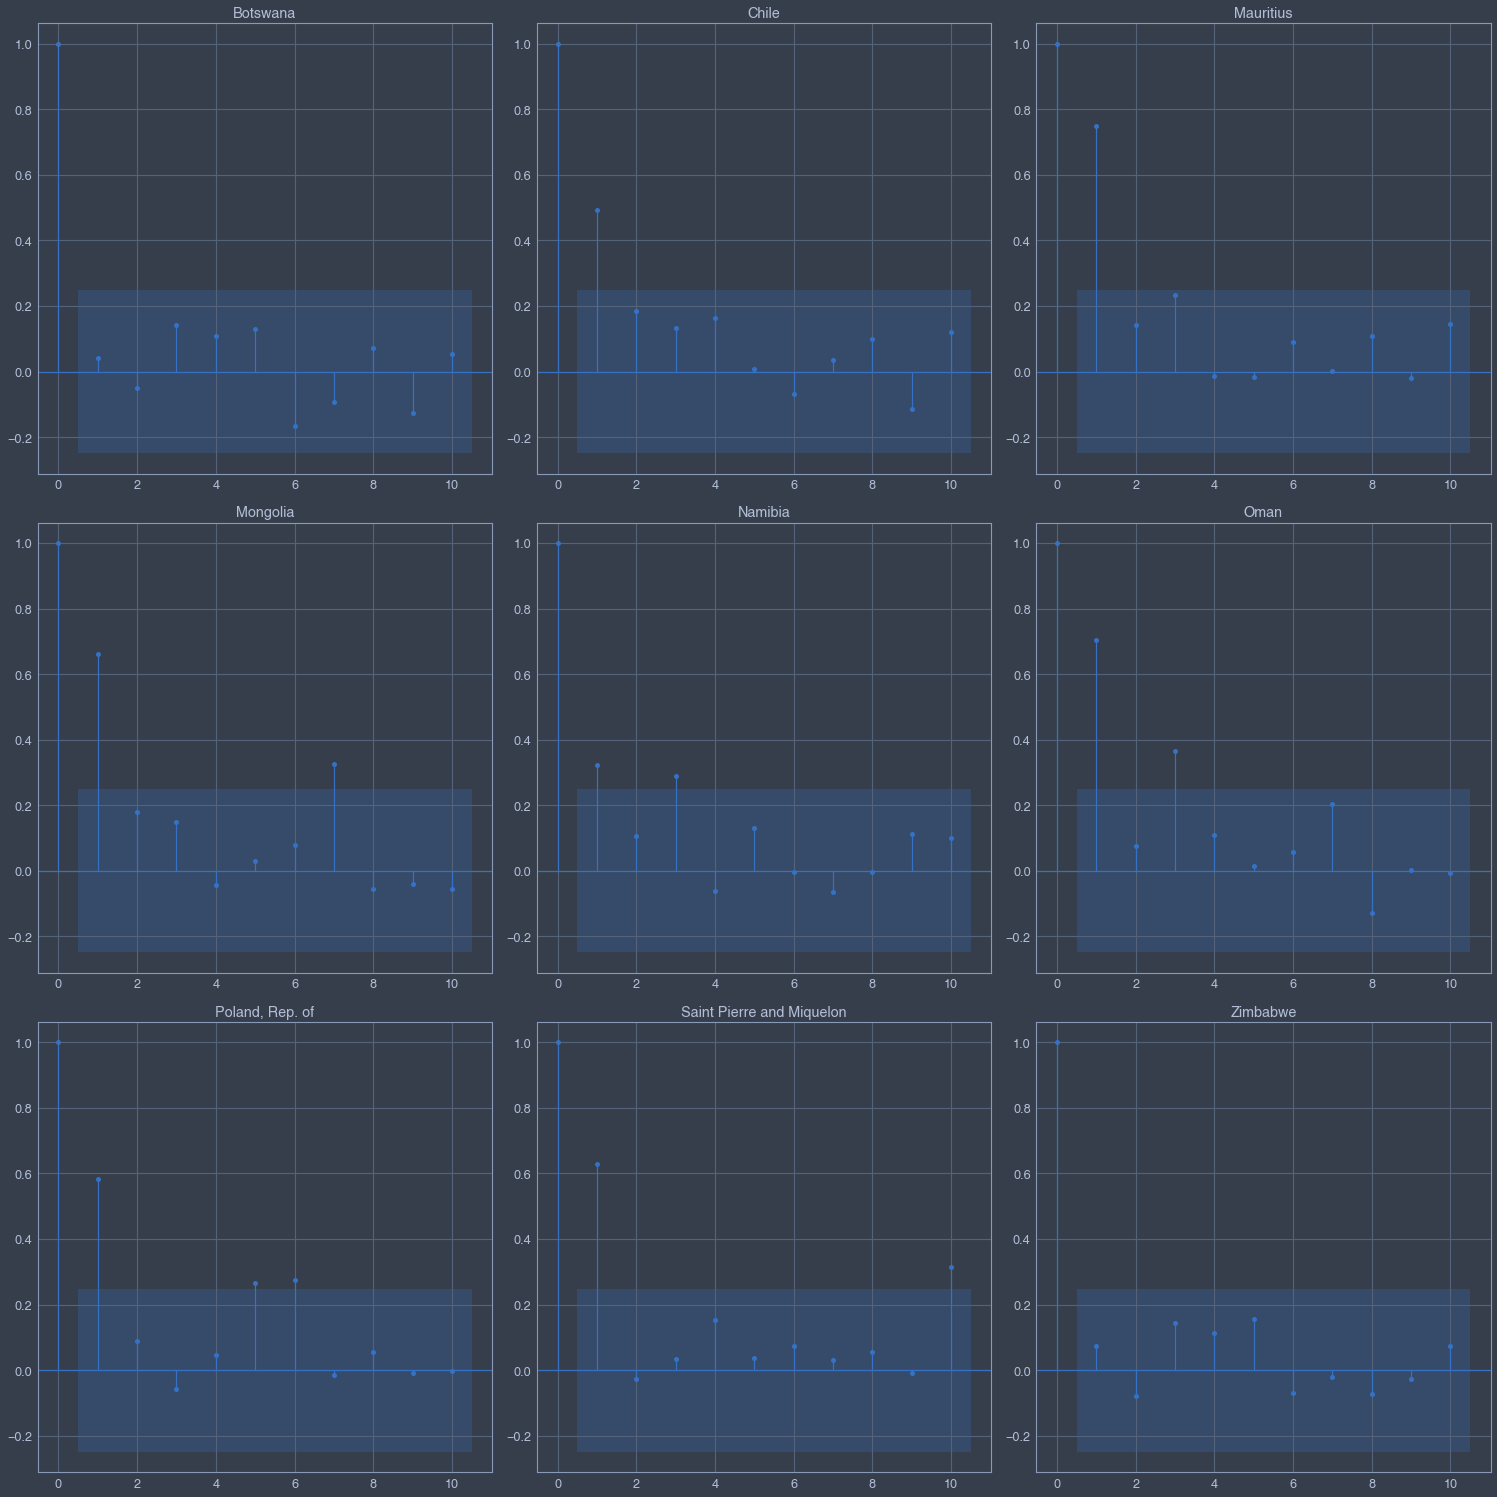

In [21]:
fig, axs = plt.subplots(3, 3, figsize=(21, 21))

axs_places = np.array(np.meshgrid([0, 1, 2], [0, 1, 2])).T.reshape(-1, 2)
for c, ax in zip(stat_country, axs_places):
    pacf = plot_pacf(data.loc[c], lags=10, ax=axs[list(ax)[0], list(ax)[1]])
    axs[list(ax)[0], list(ax)[1]].set_title(c)
fig.tight_layout()

In [48]:
data_acf = acf(data.loc['Zambia'], nlags=61, fft=True)
pd_data = [data.loc['Zambia'].autocorr(i) for i in range(1, 62)]

f:\python\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
f:\python\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [41]:
zambia = data.loc['Zambia'].reset_index()
zambia.drop('index', axis=1, inplace=True)

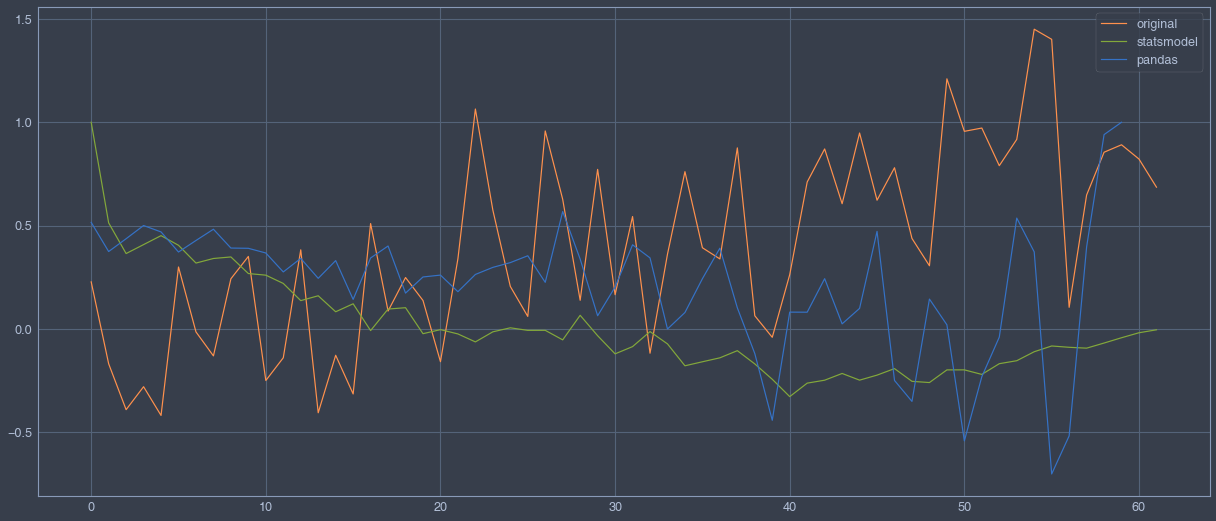

In [50]:
fig, ax = plt.subplots(1, figsize=(21, 9))

ax.plot(zambia, c='y', label='original')
ax.plot(data_acf, c='g', label='statsmodel')
ax.plot(pd_data, c='b', label='pandas')

ax.legend()

## Data from lessons

In [4]:
df_quakes = pd.read_csv('https://online.stat.psu.edu/stat510/sites/stat510/files/L01/quakes.dat',
                        delim_whitespace=True, header=None)
df_quakes

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,13,14,8,10,16,26,32,27,18,32.0,36.0,24.0,22.0,23.0,22.0
1,18,25,21,21,14,8,11,14,23,18.0,17.0,19.0,20.0,22.0,19.0
2,13,26,13,14,22,24,21,22,26,21.0,23.0,24.0,27.0,41.0,31.0
3,27,35,26,28,36,39,21,17,22,17.0,19.0,15.0,34.0,10.0,15.0
4,22,18,15,20,15,22,19,16,30,27.0,29.0,23.0,20.0,16.0,21.0
5,21,25,16,18,15,18,14,10,15,8.0,15.0,6.0,11.0,8.0,7.0
6,13,10,23,16,15,25,22,20,16,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_quakes = pd.concat([df_quakes.loc[i] for i in range(0, 7)], ignore_index=True)
df_quakes.dropna(inplace=True)
df_quakes

0     13.0
1     14.0
2      8.0
3     10.0
4     16.0
      ... 
94    15.0
95    25.0
96    22.0
97    20.0
98    16.0
Length: 99, dtype: float64

<AxesSubplot:>

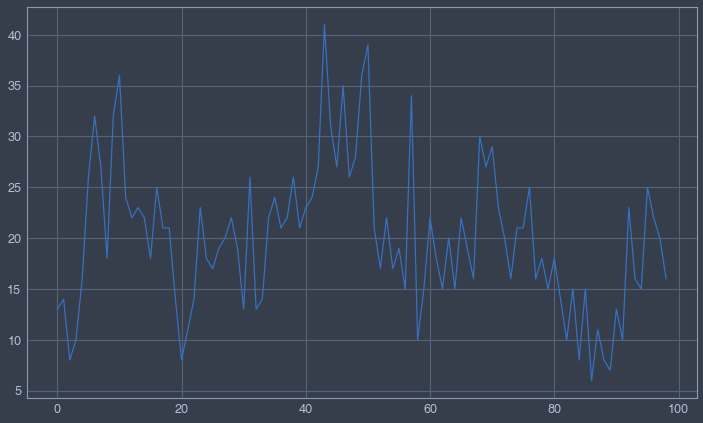

In [7]:
df_quakes.plot()

In [11]:
stat_test = adfuller(df_quakes, autolag='AIC')
print(f'Test Statistic: {stat_test[0]}\np_value: {stat_test[1]}\nCritical Values: {stat_test[4]}')

Test Statistic: -3.183192251191782
p_value: 0.02097842525600371
Critical Values: {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


In [6]:
df_cmort = pd.read_csv('https://online.stat.psu.edu/stat510/sites/stat510/files/L01/cmort.dat',
                       delim_whitespace=True, header=None)
df_cmort.head()

,0
0,97.85
1,104.64
2,94.36
3,98.05
4,95.85


<AxesSubplot:>

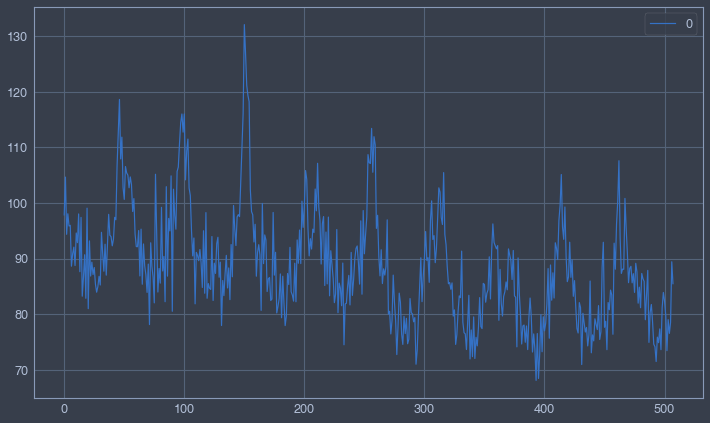

In [8]:
df_cmort.plot()

In [12]:
stat_test = adfuller(df_cmort, autolag='AIC')
print(f'Test Statistic: {stat_test[0]}\np_value: {stat_test[1]}\nCritical Values: {stat_test[4]}')

Test Statistic: -4.815687630710125
p_value: 5.074987511904784e-05
Critical Values: {'1%': -3.443339692005083, '5%': -2.8672689011327894, '10%': -2.569821287318971}
